<h1><center><font size="6">Final Modeling Notebook</font></center></h1>



# <a id='0'>Contents</a>

- <a href='#1'>Importing Packages</a>
- <a href='#2'>Base Model</a>  
    - <a href='#21'>Logistic Regression</a>
    - <a href='#22'>Random Forest Classifier</a>
    - <a href='#23'>Decision Tree Classifier</a>
    - <a href='#24'>K-Nearest Neighbors</a>
    - <a href='#25'>Gaussian Naive Bayes Classifier</a>
    - <a href='#26'>Linear Discriminant Analysis</a>
    - <a href='#27'>AdaBoost Classifier</a>
    - <a href='#28'>Gradient Boosting Classifier</a>
    - <a href='#29'>XGBoost Classifier</a>
- <a href='#3'>Model with Engineered Features</a>
    - <a href='#31'>Logistic Regression</a>
    - <a href='#32'>Random Forest Classifier</a>
    - <a href='#33'>Decision Tree Classifier</a>
    - <a href='#34'>K-Nearest Neighbors</a>
    - <a href='#35'>Gaussian Naive Bayes Classifier</a>
    - <a href='#36'>Linear Discriminant Analysis</a>
    - <a href='#37'>AdaBoost Classifier</a>
    - <a href='#38'>Gradient Boosting Classifier</a>
    - <a href='#39'>XGBoost Classifier</a>
- <a href='#4'>Feature Selection</a>
    - <a href='#41'>Decision Tree Feature Importance</a>
    - <a href='#42'>Random Forest Feature Importance</a>
    - <a href='#43'>XGBoost Feature Importance</a>
    - <a href='#44'>Recursive Feature Elimination with Cross-Validation</a>
- <a href='#5'>Discussion of Evaluation Metrics</a>


In [ ]:
# Importing Packages

In [40]:
import numpy as np 
import pandas as pd
import re
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import itertools
from collections import Counter


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, classification_report, plot_confusion_matrix, auc, mean_squared_error, confusion_matrix, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector as selector

from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, EasyEnsembleClassifier, RUSBoostClassifier
from imblearn.metrics import geometric_mean_score
from imblearn.under_sampling import TomekLinks

import xgboost as xgb
from xgboost.sklearn import XGBClassifier


%reload_ext autoreload
%autoreload 2

from utils import *

plt.style.use("fivethirtyeight")
sns.set_theme(style="darkgrid", font='serif', context='poster')

# Importing Model

In [7]:
train = pd.read_csv("../data/train_model.csv")
validate = pd.read_csv("../data/validate_model.csv")
X_train = train.drop(['default'], axis=1)
y_tr = train['default']
X_validate = validate.drop(['default'], axis=1)
y_val = validate['default']

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr = scaler.transform(X_train)
X_val = scaler.transform(X_validate)

# <a id='5'>Class Imbalance</a>

In [13]:
bc = BaggingClassifier(n_estimators=50, random_state=42).fit(X_tr, y_tr)
bbc = BalancedBaggingClassifier(n_estimators=50, random_state=42).fit(X_tr, y_tr)
y_pred_bc_tr = bc.predict(X_tr)
y_pred_bc_val = bc.predict(X_val)
y_pred_bbc_tr = bbc.predict(X_tr)
y_pred_bbc_val = bbc.predict(X_val)

Bagging Classifier Performance:
Balanced training accuracy: 1.00 - Geometric mean 1.00
Balanced validation accuracy: 0.65 - Geometric mean 0.58
Training Accuracy:  0.9974761904761905
Validation Accuracy:  0.8121666666666667
Training F1 Score:  0.9942955548380152
Validation F1 Score:  0.45158150851581513
Training AUC Score:  0.9999107199926662
Validation AUC Score:  0.7449771539987367
Training Recall Score:  0.992053264604811
Validation Recall Score:  0.3533891850723534
Training Precision Score:  0.9965480043149946
Validation Precision Score:  0.6253369272237197
Training Average Precision Score:  0.9996739002353177
Validation Average Precision Score:  0.4901760592085543

Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16344
           1       1.00      0.99      0.99      4656

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg    

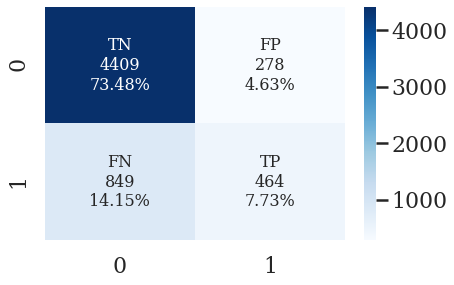

In [14]:
print('Bagging Classifier Performance:')
print('Balanced training accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_tr, y_pred_bc_tr), geometric_mean_score(y_tr, y_pred_bc_tr)))
print('Balanced validation accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_val, y_pred_bc_val), geometric_mean_score(y_val, y_pred_bc_val)))
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_bc_tr, y_pred_bc_val, bc)

Balanced Bagging Classifier Performance:
Balanced training accuracy: 0.96 - Geometric mean 0.00
Balanced validation accuracy: 0.69 - Geometric mean 0.67
Training Accuracy:  0.9441428571428572
Validation Accuracy:  0.7758333333333334
Training F1 Score:  0.8880190930787589
Validation F1 Score:  0.5107311749727174
Training AUC Score:  0.9958517714814478
Validation AUC Score:  0.7631246901421198
Training Recall Score:  0.998926116838488
Validation Recall Score:  0.5346534653465347
Training Precision Score:  0.7992782264993985
Validation Precision Score:  0.48885793871866295
Training Average Precision Score:  0.9829377946438187
Validation Average Precision Score:  0.5164493722987966

Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     16344
           1       0.80      1.00      0.89      4656

    accuracy                           0.94     21000
   macro avg       0.90      0.96      0.93     21000
weighte

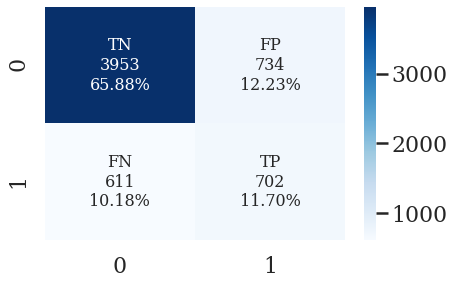

In [15]:
print('Balanced Bagging Classifier Performance:')
print('Balanced training accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_tr, y_pred_bbc_tr), geometric_mean_score(y_val, y_pred_bbc_tr)))
print('Balanced validation accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_val, y_pred_bbc_val), geometric_mean_score(y_val, y_pred_bbc_val)))
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_bbc_tr, y_pred_bbc_val, bbc)

# Undersampling Methods

In [16]:
from imblearn.under_sampling import NearMiss 

In [17]:
# define the undersampling method
undersample = NearMiss(version=1)
counter = Counter(y_tr)
print(counter)

Counter({0: 16344, 1: 4656})


In [18]:
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_tr_res_nm, y_tr_res_nm = undersample.fit_resample(X_tr, y_tr)
# summarize the new class distribution
counter = Counter(y_tr_res_nm)
print(counter)

Counter({0: 4656, 1: 4656})


In [19]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
from matplotlib import pyplot
from numpy import where

In [20]:
# summarize class distribution
counter = Counter(y_tr)
print(counter)
# define the undersampling method
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# transform the dataset
X_tr_res_ncr, y_tr_res_ncr = undersample.fit_resample(X_tr, y_tr)
# summarize the new class distribution
counter = Counter(y_tr_res_ncr)
print(counter)

Counter({0: 16344, 1: 4656})
Counter({0: 10212, 1: 4656})


In [22]:
from imblearn.under_sampling import OneSidedSelection
counter = Counter(y_tr)
print(counter)
# define the undersampling method
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
# transform the dataset
X_tr_res_oss, y_tr_res_oss = undersample.fit_resample(X_tr, y_tr)
# summarize the new class distribution
counter = Counter(y_tr_res_oss)
print(counter)

Counter({0: 16344, 1: 4656})
Counter({0: 13717, 1: 4656})


## Random Oversampling and Undersampling for Imbalanced Classification

In [25]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [28]:
model = DecisionTreeClassifier()
# define resampling
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
# define pipeline
pipeline = Pipeline(steps=[('o', over), ('u', under), ('m', model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X_tr, y_tr, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: nan


In [8]:
##def evaluate_classifier(clf, df_scores, clf_name=None):
    from sklearn.pipeline import Pipeline
    if clf_name is None:
        if isinstance(clf, Pipeline):
            clf_name = clf[-1].__class__.__name__
        else:
            clf_name = clf.__class__.__name__
    acc = clf.fit(X_tr3, y_tr).score(X_val3, y_vval)
    y_pred = clf.predict(X_val3)
    bal_acc = balanced_accuracy_score(y_val, y_pred)
    clf_score = pd.DataFrame(
        {clf_name: [acc, bal_acc]},
        index=['Accuracy', 'Balanced accuracy']
    )
    df_scores = pd.concat([df_scores, clf_score], axis=1).round(decimals=3)
    return df_scores


# Let's define an empty dataframe to store the results
df_scores = pd.DataFrame()

In [9]:
num_pipe = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore")
)
preprocessor_linear = ColumnTransformer(
    [("num-pipe", num_pipe, selector(dtype_include=np.number)),
     ("cat-pipe", cat_pipe, selector(dtype_include=pd.CategoricalDtype))],
    n_jobs=2
)
lr_clf = make_pipeline(
    preprocessor_linear, LogisticRegression(max_iter=1000)
)

NameError: name 'make_pipeline' is not defined

## Tomek Links

In [ ]:
tl = TomekLinks()
X_res_tom, y_res_tom = tl.fit_resample(X_train3, y_tr)
print('Original dataset shape %s' % Counter(y_tr))
print('Resampled dataset shape %s' % Counter(y_res_tom))

# Hyperparamater Tuning

## Logistic Regression with GridSearchCV

In [54]:
# logreg = LogisticRegression()
# params = {'C': [0.001, 0.01, 0.1, 1, 10], 
#           'penalty': ['none', 'l1', 'l2', 'elasticnet'],
#           'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}
# gslog = GridSearchCV(estimator = logreg,
#                      param_grid = params,
#                      scoring = 'average_precision',
#                      cv = 10,
#                      n_jobs = -1).fit(X_tr, y_tr)
# y_pred_gslog_tr = gslog.predict(X_tr)
# y_pred_gslog_val = gslog.predict(X_val)
# print("Best: %f using %s" % (gslog.best_score_, gslog.best_params_))
# print("")
# get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gslog_tr, y_pred_gslog_val, gslog)

# Best: 0.527854 using {'C': 1, 'penalty': 'l1', 'solver': 'saga'}

Training Accuracy:  0.8203333333333334
Validation Accuracy:  0.8166666666666667
Training F1 Score:  0.45891294994980647
Validation F1 Score:  0.4393476044852192
Training AUC Score:  0.7551612491022064
Validation AUC Score:  0.7500198650283042
Training Recall Score:  0.3436426116838488
Validation Recall Score:  0.32825590251332826
Training Precision Score:  0.6905481225722918
Validation Precision Score:  0.6640986132511556
Training Average Precision Score:  0.5273685630792911
Validation Average Precision Score:  0.5003419686114439

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     16344
           1       0.69      0.34      0.46      4656

    accuracy                           0.82     21000
   macro avg       0.76      0.65      0.68     21000
weighted avg       0.80      0.82      0.80     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0

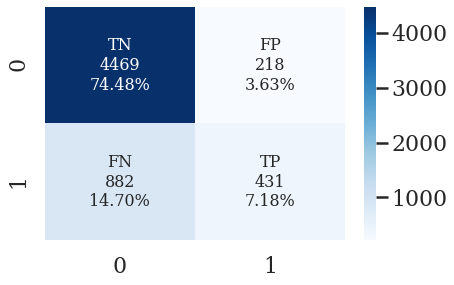

In [53]:
logb = LogisticRegression(C=1, penalty='l1', solver='saga').fit(X_tr, y_tr)
y_pred_logb_tr = logb.predict(X_tr)
y_pred_logb_val = logb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_logb_tr, y_pred_logb_val, logb)

## Decision Tree Classifier with GridSearchCCV

In [52]:
# dtc = DecisionTreeClassifier()
# params = {'criterion': ['gini', 'entropy'],
#           'max_depth': [2, 4, 6, 8, 10],
#           'min_samples_leaf': [2, 4, 6, 8, 10], 
#           'min_samples_split': [2, 4, 6, 8, 10]}
# gsdtc = GridSearchCV(estimator = dtc,
#                      param_grid = params,
#                      scoring = 'average_precision',
#                      cv = 5,
#                      n_jobs = -1).fit(X_tr, y_tr)
# y_pred_gsdtc_tr = gsdtc.predict(X_tr)
# y_pred_gsdtc_val = gsdtc.predict(X_val)
# print("Best: %f using %s" % (gsdtc.best_score_, gsdtc.best_params_))
# print("")
# get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsdtc_tr, y_pred_gsdtc_val, gsdtc)

# # Best: 0.511668 using {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 8}


Training Accuracy:  0.826047619047619
Validation Accuracy:  0.8173333333333334
Training F1 Score:  0.5002052264331646
Validation F1 Score:  0.46168958742632615
Training AUC Score:  0.781021964090777
Validation AUC Score:  0.7602510452092296
Training Recall Score:  0.39261168384879724
Validation Recall Score:  0.357958872810358
Training Precision Score:  0.6890312853373539
Validation Precision Score:  0.6500691562932227
Training Average Precision Score:  0.5600665276232221
Validation Average Precision Score:  0.5058735868130263

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.89     16344
           1       0.69      0.39      0.50      4656

    accuracy                           0.83     21000
   macro avg       0.77      0.67      0.70     21000
weighted avg       0.81      0.83      0.81     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0   

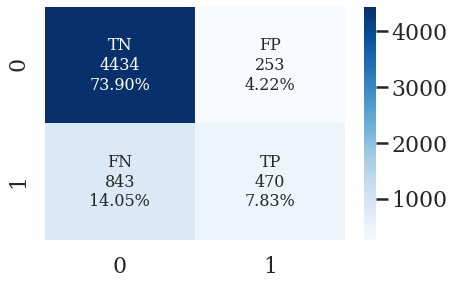

In [51]:
dtcb = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10, min_samples_split=8).fit(X_tr, y_tr)
y_pred_dtcb_tr = dtcb.predict(X_tr)
y_pred_dtcb_val = dtcb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_dtcb_tr, y_pred_dtcb_val, dtcb)

## Random Forest Classifier with GridSearchCV

In [50]:
# rfc = RandomForestClassifier()
# params = {'n_estimators': [100, 200, 400, 600, 1000],
#           'criterion': ['entropy', 'gini'],
#           'max_depth': [5, 8, 15, 25, 30],
#           'min_samples_split': [2, 5, 10, 15, 100],
#           'min_samples_leaf': [1, 2, 5, 10]}
# gsrfc = GridSearchCV(estimator = rfc,
#                      param_grid = params,
#                      scoring = 'average_precision',
#                      cv = 5,
#                      n_jobs = -1).fit(X_tr, y_tr)
# y_pred_gsrfc_tr = gsrfc.predict(X_tr)
# y_pred_gsrfc_val = gsrfc.predict(X_val)
# print("Best: %f using %s" % (gsrfc.best_score_, gsrfc.best_params_))
# print("")
# get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsrfc_tr, y_pred_gsrfc_val, gsrfc)

# # Best: 0.558041 using {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000}

Training Accuracy:  0.8401904761904762
Validation Accuracy:  0.8208333333333333
Training F1 Score:  0.5298402913981507
Validation F1 Score:  0.46061214249874566
Training AUC Score:  0.8336297024833772
Validation AUC Score:  0.77861177494881
Training Recall Score:  0.4061426116838488
Validation Recall Score:  0.3495811119573496
Training Precision Score:  0.7618855761482676
Validation Precision Score:  0.675
Training Average Precision Score:  0.6609143205633637
Validation Average Precision Score:  0.5401255413653616

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     16344
           1       0.76      0.41      0.53      4656

    accuracy                           0.84     21000
   macro avg       0.81      0.68      0.72     21000
weighted avg       0.83      0.84      0.82     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.84     

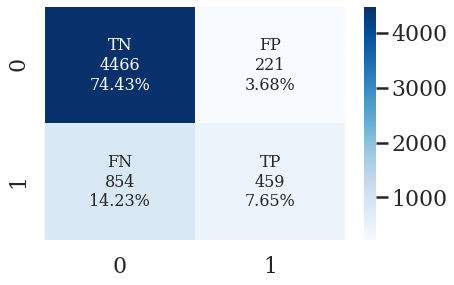

In [49]:
rfcb = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=1000).fit(X_tr, y_tr)
y_pred_rfcb_tr = rfcb.predict(X_tr)
y_pred_rfcb_val = rfcb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_rfcb_tr, y_pred_rfcb_val, rfcb)

## AdaBoost Classifier with GridSearchCV

Best: 0.542080 using {'learning_rate': 0.2, 'n_estimators': 200}

Training Accuracy:  0.8196666666666667
Validation Accuracy:  0.8186666666666667
Training F1 Score:  0.4593861527480371
Validation F1 Score:  0.442051282051282
Training AUC Score:  0.7889149790458745
Validation AUC Score:  0.7720152043432995
Training Recall Score:  0.34557560137457044
Validation Recall Score:  0.32825590251332826
Training Precision Score:  0.6849723286504895
Validation Precision Score:  0.6766091051805337
Training Average Precision Score:  0.5570414178758096
Validation Average Precision Score:  0.5189599679378362

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16344
           1       0.68      0.35      0.46      4656

    accuracy                           0.82     21000
   macro avg       0.76      0.65      0.68     21000
weighted avg       0.80      0.82      0.80     21000


Validation Classification Report: 
  

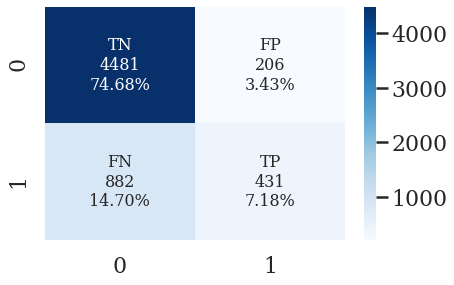

In [62]:
abc = AdaBoostClassifier()
params = {'n_estimators': [10, 50, 100, 200],
          'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]}
gsabc = GridSearchCV(estimator = abc,
                     param_grid = params,
                     n_jobs = -1,
                     cv = 5,
                     scoring = 'average_precision').fit(X_tr, y_tr)
y_pred_gsabc_tr = gsabc.predict(X_tr)
y_pred_gsabc_val = gsabc.predict(X_val)
print("Best: %f using %s" % (gsabc.best_score_, gsabc.best_params_))
print("")
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsabc_tr, y_pred_gsabc_val, gsabc)

# Best: 0.542080 using {'learning_rate': 0.2, 'n_estimators': 200}

Training Accuracy:  0.8196666666666667
Validation Accuracy:  0.8186666666666667
Training F1 Score:  0.4593861527480371
Validation F1 Score:  0.442051282051282
Training AUC Score:  0.7889149790458745
Validation AUC Score:  0.7720152043432995
Training Recall Score:  0.34557560137457044
Validation Recall Score:  0.32825590251332826
Training Precision Score:  0.6849723286504895
Validation Precision Score:  0.6766091051805337
Training Average Precision Score:  0.5570414178758096
Validation Average Precision Score:  0.5189599679378362

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16344
           1       0.68      0.35      0.46      4656

    accuracy                           0.82     21000
   macro avg       0.76      0.65      0.68     21000
weighted avg       0.80      0.82      0.80     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0 

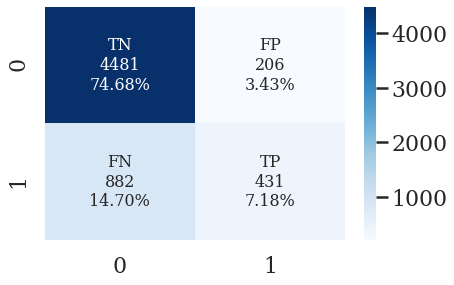

In [61]:
abcb = AdaBoostClassifier(learning_rate=0.2, n_estimators=200).fit(X_tr, y_tr)
y_pred_abcb_tr = abcb.predict(X_tr)
y_pred_abcb_val = abcb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_abcb_tr, y_pred_abcb_val, abcb)

## Gradient Boosting Classifier with GridSearchCV

In [65]:
# gbc = GradientBoostingClassifier()
# params = {'n_estimators': [10, 100, 1000],
#           'learning_rate': [0.001, 0.01, 0.1],
#           'max_depth': [3, 7, 9]}
# gsgbc = GridSearchCV(estimator = gbc,
#                      param_grid = params, 
#                      n_jobs = -1, 
#                      cv = 5, 
#                      scoring = 'average_precision').fit(X_tr, y_tr)
# y_pred_gsgbc_tr = gsgbc.predict(X_tr)
# y_pred_gsgbc_val = gsgbc.predict(X_val)
# print("Best: %f using %s" % (gsgbc.best_score_, gsgbc.best_params_))
# print("")
# get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsgbc_tr, y_pred_gsgbc_tr, gsgbc)

# # Best: 0.554906 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}

Training Accuracy:  0.828047619047619
Validation Accuracy:  0.82
Training F1 Score:  0.500898410504492
Validation F1 Score:  0.46375372393247266
Training AUC Score:  0.8083487687611541
Validation AUC Score:  0.7790505930178122
Training Recall Score:  0.38917525773195877
Validation Recall Score:  0.3556740289413557
Training Precision Score:  0.7025979061651803
Validation Precision Score:  0.666191155492154
Training Average Precision Score:  0.6072201316850476
Validation Average Precision Score:  0.5396238144281216

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     16344
           1       0.70      0.39      0.50      4656

    accuracy                           0.83     21000
   macro avg       0.77      0.67      0.70     21000
weighted avg       0.81      0.83      0.81     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.84      

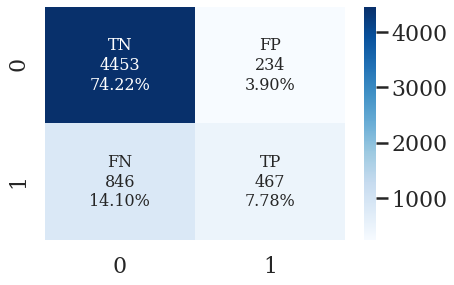

In [64]:
gbcb = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000).fit(X_tr, y_tr)
y_pred_gbcb_tr = gbcb.predict(X_tr)
y_pred_gbcb_val = gbcb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gbcb_tr, y_pred_gbcb_val, gbcb)

## XGBoost Classifier with GridSearchCV

In [46]:
# xgb = XGBClassifier()
# params = {'n_estimators': [50, 100, 150, 200], 
#           'max_depth': [3, 5, 7, 10], 
#           'min_child_weight': [2, 3, 4, 5]}
# gsxgb = GridSearchCV(estimator = xgb,
#                      param_grid = params,
#                      scoring = 'average_precision',
#                      cv = 5,
#                      n_jobs = -1).fit(X_tr, y_tr)
# y_pred_gsxgb_tr = gsxgb.predict(X_tr)
# y_pred_gsxgb_val = gsxgb.predict(X_val)
# print("Best: %f using %s" % (gsxgb.best_score_, gsxgb.best_params_))
# print("")
# get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsxgb_tr, y_pred_gsxgb_val, gsxgb)

# Best: 0.550954 using {'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50}

[10:32:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.8284285714285714
Validation Accuracy:  0.8183333333333334
Training F1 Score:  0.5039239983477901
Validation F1 Score:  0.45878848063555117
Training AUC Score:  0.8163144534896629
Validation AUC Score:  0.7758664199124118
Training Recall Score:  0.39304123711340205
Validation Recall Score:  0.3518659558263519
Training Precision Score:  0.7019562715765247
Validation Precision Score:  0.6590584878744651
Training Average Precision Score:  0.6116102705441417
Validation Average Precision Score:  0.5359007091828918

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     16344
          

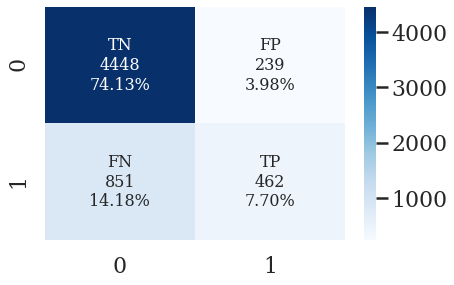

In [45]:
xgbb = XGBClassifier(max_depth=3, min_child_weight=3, n_estimators=50).fit(X_tr, y_tr)
y_pred_xgbb_tr = xgbb.predict(X_tr)
y_pred_xgbb_val = xgbb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_xgbb_tr, y_pred_xgbb_val, xgbb)

In [ ]:
data = {'Accuracy': [accuracy(y_val, y_pred_log_val), 
                     accuracy(y_val, y_pred_rfc_val), 
                     accuracy(y_val, y_pred_dtc_val), 
                     accuracy(y_val, y_pred_knn_val), 
                     accuracy(y_val, y_pred_gnb_val), 
                     accuracy(y_val, y_pred_lda_val), 
                     accuracy(y_val, y_pred_abc_val), 
                     accuracy(y_val, y_pred_gbc_val),
                     accuracy(y_val, y_pred_xgb_val)],
        'F1 Score': [f1(y_val, y_pred_log_val), 
                     f1(y_val, y_pred_rfc_val), 
                     f1(y_val, y_pred_dtc_val), 
                     f1(y_val, y_pred_knn_val), 
                     f1(y_val, y_pred_gnb_val), 
                     f1(y_val, y_pred_lda_val), 
                     f1(y_val, y_pred_abc_val), 
                     f1(y_val, y_pred_gbc_val),
                     f1(y_val, y_pred_xgb_val)],
        'ROC AUC': [auc(X_val, y_val, logreg),
                      auc(X_val, y_val, rfc),
                      auc(X_val, y_val, dtc),
                      auc(X_val, y_val, knn),
                      auc(X_val, y_val, gnb),
                      auc(X_val, y_val, lda),
                      auc(X_val, y_val, abc),
                      auc(X_val, y_val, gbc),
                      auc(X_val, y_val, xgb)],
        'Recall': [recall(y_val, y_pred_log_val), 
                   recall(y_val, y_pred_rfc_val), 
                   recall(y_val, y_pred_dtc_val), 
                   recall(y_val, y_pred_knn_val), 
                   recall(y_val, y_pred_gnb_val), 
                   recall(y_val, y_pred_lda_val), 
                   recall(y_val, y_pred_abc_val),
                   recall(y_val, y_pred_gbc_val),
                   recall(y_val, y_pred_xgb_val)],
        'Precision': [precision(y_val, y_pred_log_val), 
                      precision(y_val, y_pred_rfc_val), 
                      precision(y_val, y_pred_dtc_val), 
                      precision(y_val, y_pred_knn_val), 
                      precision(y_val, y_pred_gnb_val),
                      precision(y_val, y_pred_lda_val), 
                      precision(y_val, y_pred_abc_val),
                      precision(y_val, y_pred_gbc_val),
                      precision(y_val, y_pred_xgb_val)],
        'PR AUC': [aps(X_val, y_val, logreg),
                   aps(X_val, y_val, rfc),
                   aps(X_val, y_val, dtc),
                   aps(X_val, y_val, knn),
                   aps(X_val, y_val, gnb),
                   aps(X_val, y_val, lda),
                   aps(X_val, y_val, abc),
                   aps(X_val, y_val, gbc),
                   aps(X_val, y_val, xgb)]}
scores = pd.DataFrame(data=data, index = ['Logistic Regression', 
                                          'Random Forest Classifier', 
                                          'Decision Tree Classifier', 
                                          'K-Nearest Neighbors', 
                                          'Gaussian Naive Bayes', 
                                          'Linear Discriminant Analysis', 
                                          'AdaBoost Classifier', 
                                          'Gradient Boosting Classifier',
                                          'XGBoost Classifier'])